In [2]:
!pip install wordcloud

In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
originalData = pd.read_csv('OneDrive\Desktop\AB_NYC_2019.csv')
data = pd.read_csv('OneDrive\Desktop\AB_NYC_2019.csv').dropna(axis = 0, how = 'any')
display(data)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [5]:
data['price'].mean()

142.33252621004095

In [6]:
data['price'].std()

196.99475591833985

In [7]:
data['latitude'].min()

40.50641

In [8]:
data['latitude'].max()

40.91306

In [9]:
data['longitude'].min()


-74.24442

In [10]:
data['longitude'].max()

-73.71299

In [11]:
data['price'].min()

0

In [12]:
data['price'].max()

10000

In [13]:
data['minimum_nights'].min()

1

In [14]:
data['minimum_nights'].max()

1250

In [15]:
data['number_of_reviews'].min()

1

In [16]:
data['number_of_reviews'].max()

629

In [17]:
data['last_review'].min()

'2011-03-28'

In [18]:
data['last_review'].max()

'2019-07-08'

In [19]:
data['reviews_per_month'].min()

0.01

In [20]:
data['reviews_per_month'].max()

58.5

In [21]:
data['calculated_host_listings_count'].min()

1

In [22]:
data['calculated_host_listings_count'].max()

327

In [23]:
data['availability_365'].min()

0

In [24]:
data['availability_365'].max()

365

1) First I obtained the uncleaned data set and printed its contents to have a priliminary understanding of the data.  To begin cleaning, I dropped every row with at least one missing column using the pandas dropna method. Afterwards, I printed the minumum and maximum values of each numeric (non word) feature of the data set to examine whether the numbers were reasonable without further inspection. For instance, I inspected the latitude and longitutde to ensure that they were within valid range of NYC. There were a number of rows that had relatively unlikely values, but I think that having a couple strange values could prove to be useful and interesting. It would be a diservice to myself to remove artifacts thinking they were errors.

In [25]:
all_neighbourhoods = data.groupby('neighbourhood').filter(lambda neighbourhood: 5 < len(neighbourhood))

In [26]:
neighbourhoods = all_neighbourhoods.groupby('neighbourhood').agg('mean')

In [27]:
sortedByPrice = neighbourhoods.sort_values(by='price')['price']

Bottom 5 Based on Price

In [28]:
sortedByPrice.head()

neighbourhood
Tremont        49.900000
Hunts Point    51.812500
Bronxdale      51.875000
Soundview      52.846154
Corona         56.932203
Name: price, dtype: float64

Top 5 Based on Price

In [29]:
sortedByPrice.tail()

neighbourhood
Midtown              267.583164
SoHo                 281.303136
Flatiron District    291.482759
NoHo                 298.451613
Tribeca              460.300000
Name: price, dtype: float64

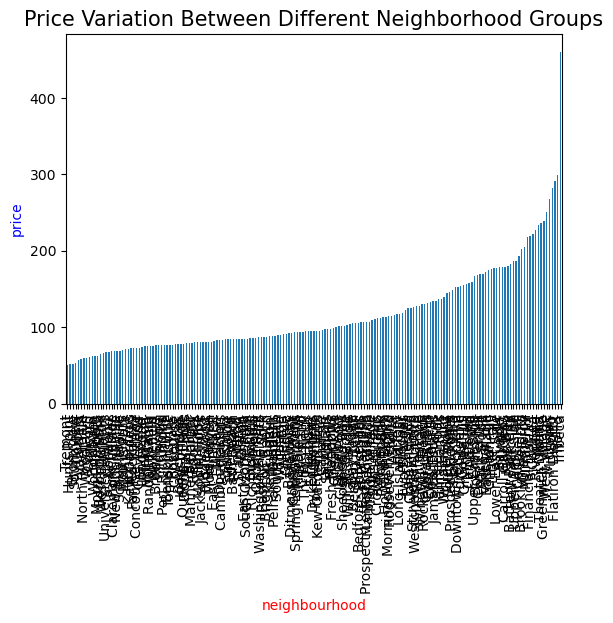

In [30]:
plt.title('Price Variation Between Different Neighborhood Groups', fontsize = 15)
plt.xlabel('neighbourhoods', fontsize=10, color='red')
plt.ylabel('price', fontsize=10, color='blue')

data['price'] = data['price'].astype('float')
sortedByPrice.plot(kind = 'bar')
plt.show()

In [31]:
reviewsVsAvailability = data['reviews_per_month'].corr(data['availability_365']) 
print(reviewsVsAvailability)

0.18589567903408583


Text(0.5, 1.0, 'Heatmap Depicting Corelation between Aspects of NYC AirBnbs')

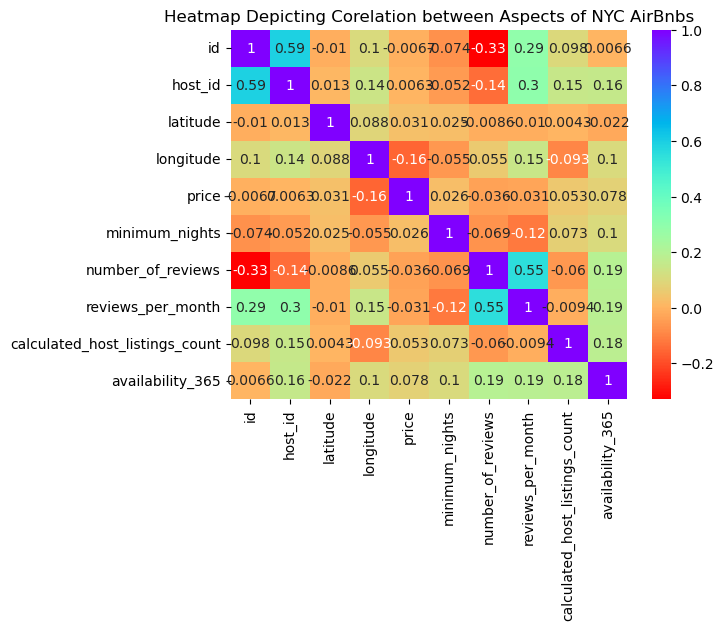

In [83]:
dataplot = sns.heatmap(data.corr(method='pearson'), cmap="rainbow_r", annot=True)
plt.title('Heatmap Depicting Corelation between Aspects of NYC AirBnbs')

Text(0, 0.5, 'latitude')

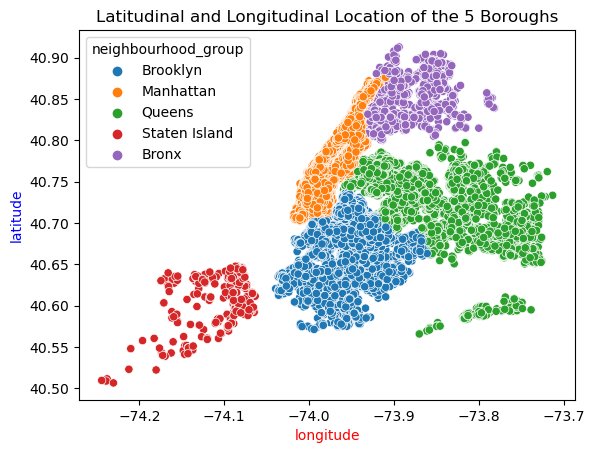

In [138]:
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Latitudinal and Longitudinal Location of the 5 Boroughs')
plt.xlabel('longitude', fontsize=10, color='red')
plt.ylabel('latitude', fontsize=10, color='blue')

Text(0, 0.5, 'latitude')

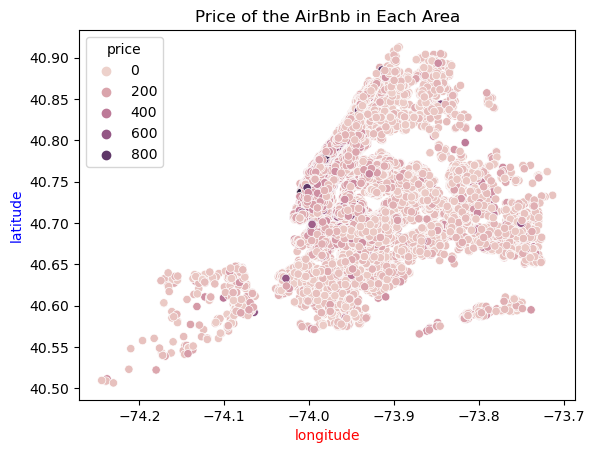

In [149]:
lessThan1000 = data[(data['price'] < 1000)]
sns.scatterplot(data=lessThan1000, x='longitude', y='latitude', hue='price')
plt.title('Price of the AirBnb in Each Area')
plt.xlabel('longitude', fontsize=10, color='red')
plt.ylabel('latitude', fontsize=10, color='blue')

By looking at the two scatterplots side by side, it is evident that the majority of the most expensive Airbnbs are in the upperbrooklyn to lower manhattan area, as is demonstrated by the dark purple points. However, it is interesting to consider that there are both very expensive and very inexpensive Airbnbs spread across all five boroughs of NYC. 

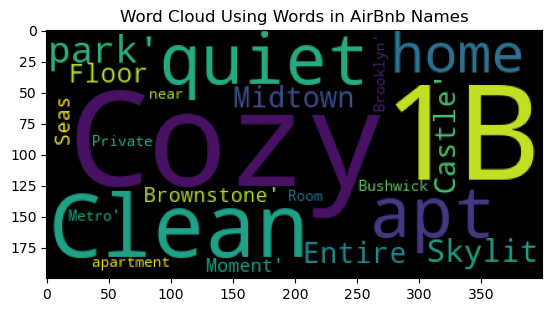

In [101]:
words = data['name'].values
wordCloud = WordCloud().generate(str(words))
plt.title('Word Cloud Using Words in AirBnb Names')
plt.imshow(wordCloud)
plt.show()

In [152]:
data.groupby('neighbourhood').agg('mean').sort_values(by='calculated_host_listings_count')['calculated_host_listings_count']

neighbourhood
Holliswood              1.000000
Howland Hook            1.000000
Rossville               1.000000
Mount Eden              1.000000
West Farms              1.000000
                         ...    
Woodside               12.100000
Eastchester            13.000000
Theater District       20.655405
Murray Hill            45.469453
Financial District    118.245580
Name: calculated_host_listings_count, Length: 218, dtype: float64

In [153]:
data.groupby('host_id').agg('count').sort_values(by='calculated_host_listings_count')['calculated_host_listings_count']

host_id
2438           1
47952362       1
47933513       1
47932600       1
47931146       1
            ... 
7503643       49
137358866     51
16098958      61
61391963      79
219517861    207
Name: calculated_host_listings_count, Length: 30232, dtype: int64

In [140]:
busiest_host_ids = data.groupby('host_id').agg('mean').sort_values(by='calculated_host_listings_count')['calculated_host_listings_count'].tail().index.values

In [141]:
busiest_host_listings = data.loc[data['host_id'].isin(busiest_host_ids)]

In [142]:
busiest_host_listings.groupby('neighbourhood').agg('count')

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
Astoria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Battery Park City,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bushwick,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Chelsea,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
East Harlem,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
East Village,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elmhurst,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Financial District,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
Harlem,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [143]:
busiest_host_listings.groupby('host_id').agg('mean').sort_values('price')[['price']]

,price
host_id,
137358866,43.823529
12243051,198.034483
30283594,243.395349
219517861,270.144928
107434423,285.392857


In [144]:
data['price'].mean()

142.33252621004095

In [145]:
busiest_host_listings.groupby('host_id').agg('mean').sort_values('availability_365')[['availability_365']]

,availability_365
host_id,
137358866,205.921569
107434423,271.428571
12243051,287.241379
219517861,288.362319
30283594,318.813953


In [146]:
data['availability_365'].mean()

114.88629865279101

In [147]:
busiest_host_listings.groupby('host_id').agg('mean').sort_values('reviews_per_month')[['reviews_per_month']]

,reviews_per_month
host_id,
30283594,0.091628
107434423,0.215714
12243051,0.298276
137358866,0.444706
219517861,1.920580


In [148]:
data['reviews_per_month'].mean()

1.373229180082972

First, I grouped the data by neighbourhood and sorted by calculated_host_listings_count to determine which neighbourhoods had the largest number of listings. After that, I did grouped the data by host_id and sorted it by calculated_host_listings_count similarly to the previous step. However, I also used the index and the values in the index to create a seperate table that used the host_id as a basis. From this, I was able to display a table depicting host_id vs various other factors. Finally, I printed the average values of each aspect of the original data set. From this, I now had the values of each element of the busiest regions and hosts, and that of the entire data set. I was able to use this to make predictions on why these hosts are the busiest. For instance, the average availablity of the averge AirBnb is 114.88629865279101. However, for the busiest hosts, the availablity was about 200-300. Furthermore, this explains why the price of the busiest host is approximately 100$ more than that of the dataset as a whole.

Text(0.5, 1.0, 'Heatmap Depicting Corelation between Aspects of NYC AirBnbs')

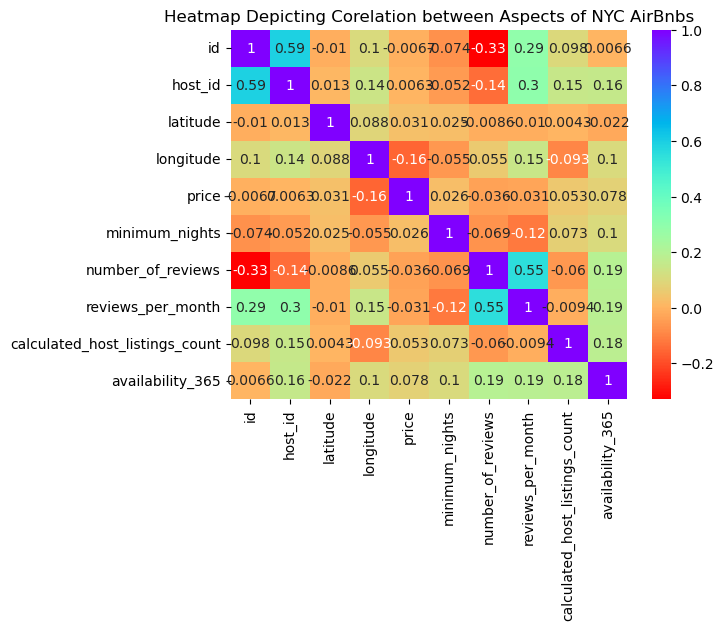

In [114]:
dataplot = sns.heatmap(data.corr(method='pearson'), cmap="rainbow_r", annot=True)
plt.title('Heatmap Depicting Corelation between Aspects of NYC AirBnbs')

In [132]:
minNightsPerPrice = all_neighbourhoods.groupby('minimum_nights').agg('mean').sort_values(by='price')['price']

Text(0, 0.5, 'minimum_nights')

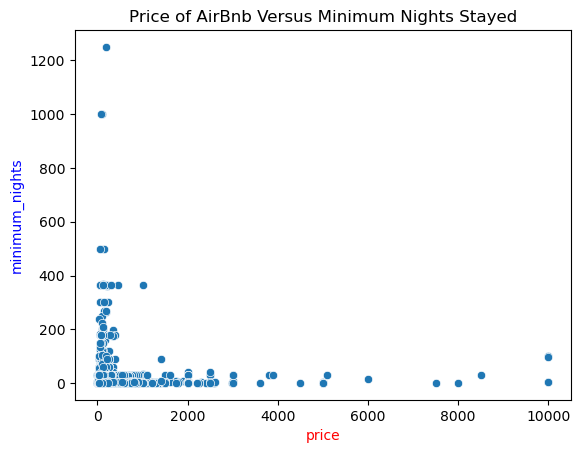

In [154]:
sns.scatterplot(data=data, x='price', y='minimum_nights')
plt.title('Price of AirBnb Versus Minimum Nights Stayed')
plt.xlabel('price', fontsize=10, color='red')
plt.ylabel('minimum_nights', fontsize=10, color='blue')

The first graph is a heatmap that demonstrates the corelation between every element of the dataset. I think that this is the most interesting model of the entire project. Before starting the assignment, I expected for there to be significant correlations between price and neighbourhood or price and availability. However, I was shocked to discover that the correlation between the elements was mostly approximately 0, meaning that there was no correlation between the elements. The maximum correlation was -0.33 between number of reviews and id. I expected a much larger correlation between a number of the elements. Of course, it is possible that I did something wrong, but if not then its a very interesting observation. The second graph represents how price may affect the minimum nights stayed at an AirBnb. It is evident that the vast majority of the points are in the 0-2000$ range, especially leaning towards the 0. It is logical to conclude that the cheaper an AirBnb is the liklier it is for people to stay there. The interesting thing about this graph is the outliers. Of course, most of the time outliers are a bad thing. However, I think its interesting to consider the outliers in this graph. There are some people who payed 10,000$ for 100-200 nights and others who payed nearly nothing but stayed for 1000+ nights. As such, this is a perfect demosntration of how a single outlier in either axis can skew the data.